In [271]:
from binance_historical_data import BinanceDataDumper

data_dumper = BinanceDataDumper(
    path_dir_where_to_dump=".",
    asset_class="spot",  # spot, um, cm
    data_type="klines",  # aggTrades, klines, trades
    data_frequency="5m",
)

print(data_dumper.get_list_all_trading_pairs())

['ETHBTC', 'LTCBTC', 'BNBBTC', 'NEOBTC', 'QTUMETH', 'EOSETH', 'SNTETH', 'BNTETH', 'BCCBTC', 'GASBTC', 'BNBETH', 'BTCUSDT', 'ETHUSDT', 'HSRBTC', 'OAXETH', 'DNTETH', 'MCOETH', 'ICNETH', 'MCOBTC', 'WTCBTC', 'WTCETH', 'LRCBTC', 'LRCETH', 'QTUMBTC', 'YOYOBTC', 'OMGBTC', 'OMGETH', 'ZRXBTC', 'ZRXETH', 'STRATBTC', 'STRATETH', 'SNGLSBTC', 'SNGLSETH', 'BQXBTC', 'BQXETH', 'KNCBTC', 'KNCETH', 'FUNBTC', 'FUNETH', 'SNMBTC', 'SNMETH', 'NEOETH', 'IOTABTC', 'IOTAETH', 'LINKBTC', 'LINKETH', 'XVGBTC', 'XVGETH', 'SALTBTC', 'SALTETH', 'MDABTC', 'MDAETH', 'MTLBTC', 'MTLETH', 'SUBBTC', 'SUBETH', 'EOSBTC', 'SNTBTC', 'ETCETH', 'ETCBTC', 'MTHBTC', 'MTHETH', 'ENGBTC', 'ENGETH', 'DNTBTC', 'ZECBTC', 'ZECETH', 'BNTBTC', 'ASTBTC', 'ASTETH', 'DASHBTC', 'DASHETH', 'OAXBTC', 'ICNBTC', 'BTGBTC', 'BTGETH', 'EVXBTC', 'EVXETH', 'REQBTC', 'REQETH', 'VIBBTC', 'VIBETH', 'HSRETH', 'TRXBTC', 'TRXETH', 'POWRBTC', 'POWRETH', 'ARKBTC', 'ARKETH', 'YOYOETH', 'XRPBTC', 'XRPETH', 'MODBTC', 'MODETH', 'ENJBTC', 'ENJETH', 'STORJBTC', 'ST

In [272]:
data_dumper.dump_data(tickers=["NEARUSDT"])

Tickers:   0%|          | 0/1 [00:00<?, ?it/s]

monthly files to download: 0files [00:00, ?files/s]

daily files to download: 0files [00:00, ?files/s]

In [273]:
import pandas as pd
import numpy as np
import os

filenames = next(os.walk("./spot/monthly/klines/NEARUSDT/5m"), (None, None, []))[2]  # [] if no file

columns = [
    "Open time",
    "Open",
    "High",
    "Low",
    "Close",
    "Volume",
    "Close time",
    "Quote asset volume",
    "Number of trades",
    "Taker buy base asset volume",
    "Taker buy quote asset volume",
    "Ignore"
]

df = pd.DataFrame(columns=columns)

for f in filenames:
    new_df = pd.read_csv(f"./spot/monthly/klines/NEARUSDT/5m/{f}", header=None, names=columns)
    df = pd.concat([df, new_df])
df = df.sort_values(by="Open time")
df

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1602651600000,1.3000,1.8800,1.1111,1.230,3553419.13,1602651899999,4.917631e+06,5556,1752338.82,2.344665e+06,0
1,1602651900000,1.2297,1.4381,1.1997,1.385,1195063.22,1602652199999,1.612363e+06,2563,701872.47,9.512006e+05,0
2,1602652200000,1.3844,1.4700,1.3207,1.367,924947.36,1602652499999,1.299402e+06,2292,565162.25,7.964966e+05,0
3,1602652500000,1.3670,1.3735,1.2222,1.250,939401.68,1602652799999,1.217898e+06,2022,429442.49,5.606299e+05,0
4,1602652800000,1.2450,1.3301,1.2428,1.330,684694.81,1602653099999,8.881953e+05,1246,424396.12,5.507958e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8923,1690846500000,1.3700,1.3710,1.3700,1.371,6809.30,1690846799999,9.330363e+03,41,4096.80,5.613781e+03,0
8924,1690846800000,1.3700,1.3730,1.3700,1.373,5623.90,1690847099999,7.717850e+03,56,4394.90,6.030549e+03,0
8925,1690847100000,1.3730,1.3730,1.3710,1.372,3748.30,1690847399999,5.141087e+03,34,2131.10,2.922604e+03,0
8926,1690847400000,1.3720,1.3720,1.3710,1.371,5760.90,1690847699999,7.899320e+03,18,2300.40,3.153848e+03,0


In [274]:
col = [
    "Open",
    "High",
    "Low",
    "Close",
    "Volume",
    "Quote asset volume"]
dataset = df.loc[:, col].astype(np.float64)
dataset = pd.DataFrame(dataset.to_numpy(), columns=col)
dataset

,Open,High,Low,Close,Volume,Quote asset volume
0,1.3000,1.8800,1.1111,1.230,3553419.13,4.917631e+06
1,1.2297,1.4381,1.1997,1.385,1195063.22,1.612363e+06
2,1.3844,1.4700,1.3207,1.367,924947.36,1.299402e+06
3,1.3670,1.3735,1.2222,1.250,939401.68,1.217898e+06
4,1.2450,1.3301,1.2428,1.330,684694.81,8.881953e+05
...,...,...,...,...,...,...
293700,1.3700,1.3710,1.3700,1.371,6809.30,9.330363e+03
293701,1.3700,1.3730,1.3700,1.373,5623.90,7.717850e+03
293702,1.3730,1.3730,1.3710,1.372,3748.30,5.141087e+03
293703,1.3720,1.3720,1.3710,1.371,5760.90,7.899320e+03


In [275]:
difference_dataset = dataset.diff().dropna().reset_index(drop=True)
difference_dataset[-256:]

,Open,High,Low,Close,Volume,Quote asset volume
293448,-0.004,-0.001,0.000,0.003,8122.7,11469.8176
293449,0.002,0.000,0.003,0.000,-9100.6,-12854.0153
293450,0.000,0.000,-0.001,-0.001,6947.8,9835.2911
293451,-0.001,0.000,0.000,0.001,-4824.9,-6834.3102
293452,0.001,-0.001,-0.001,-0.001,2347.8,3319.5803
...,...,...,...,...,...,...
293699,0.002,0.001,0.002,0.001,-2482.7,-3390.1483
293700,0.000,0.002,0.000,0.002,-1185.4,-1612.5133
293701,0.003,0.000,0.001,-0.001,-1875.6,-2576.7628
293702,-0.001,-0.001,0.000,-0.001,2012.6,2758.2332


<Axes: xlabel='time'>

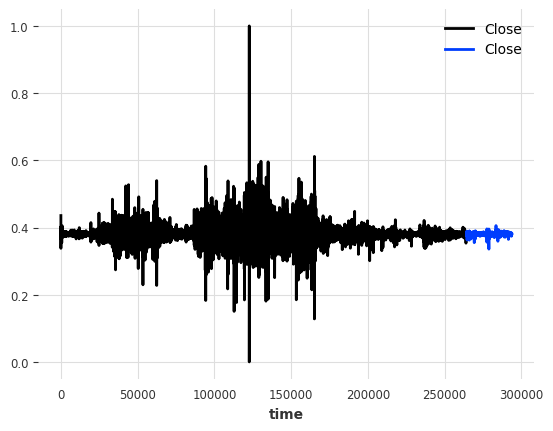

In [276]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import shutil
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm

from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.dataprocessing import Pipeline
from darts.dataprocessing.transformers import Scaler, InvertibleMapper
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
import darts.utils.timeseries_generation as tg
from darts.datasets import AirPassengersDataset, EnergyDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.missing_values import fill_missing_values
from darts.utils.likelihood_models import GaussianLikelihood

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

target_series = TimeSeries.from_dataframe(difference_dataset)

abslog = InvertibleMapper(fn=lambda x: np.sign(x) * np.log1p(np.abs(x)),
                          inverse_fn=lambda x: np.sign(x) * (np.exp(np.abs(x)) - 1))
scaler = Scaler()
pipeline = Pipeline([abslog, scaler])

target_series = pipeline.fit_transform(target_series)

target_train, target_val = target_series.split_after(0.9)

target_train["Close"].plot()
target_val["Close"].plot()

In [299]:
SEQUENCE_LENGTH = 64
my_model = RNNModel(
    model="LSTM",
    hidden_dim=32,
    n_rnn_layers=2,
    dropout=0.2,
    batch_size=16,
    n_epochs=5,
    optimizer_kwargs={"lr": 1e-3},
    random_state=0,
    training_length=SEQUENCE_LENGTH,
    input_chunk_length=SEQUENCE_LENGTH,
    likelihood=GaussianLikelihood(),
)

my_model.fit(target_train, verbose=True)

Training: 0it [00:00, ?it/s]

RNNModel(model=LSTM, hidden_dim=32, n_rnn_layers=2, dropout=0.2, training_length=64, batch_size=16, n_epochs=5, optimizer_kwargs={'lr': 0.001}, random_state=0, input_chunk_length=64, likelihood=<darts.utils.likelihood_models.GaussianLikelihood object at 0x7f55d148cd00>)

Predicting: 0it [00:00, ?it/s]

<Axes: xlabel='time'>

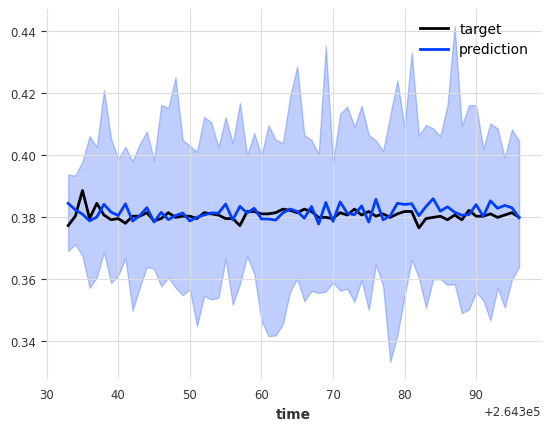

In [300]:
predict_X = target_train[-SEQUENCE_LENGTH:]
pred: TimeSeries = my_model.predict(SEQUENCE_LENGTH, predict_X, num_samples=50)

target_val["Close"].slice_intersect(pred["Close"]).plot(label="target")
pred["Close"].plot(label="prediction")


In [301]:
def inverse_diff(original_start, x):
    x = x.to_numpy()
    reversed_array = np.zeros_like(x)
    reversed_array[0] = original_start + x[0]
    for i in range(1, x.shape[0]):
        reversed_array[i] = reversed_array[i - 1] + x[i]
    return reversed_array


inverted_pred = pipeline.inverse_transform(pred)

inverted_pred = inverted_pred.mean().pd_dataframe()
original_start = dataset.iloc[predict_X[-1].time_index].to_numpy()
original_start

array([[2.05400000e+00, 2.06100000e+00, 2.05200000e+00, 2.05800000e+00,
        3.70027000e+04, 7.61481424e+04]])

In [302]:
inverted_pred[:] = inverse_diff(original_start, inverted_pred)
inverted_pred

component,Open,High,Low,Close,Volume,Quote asset volume
time,,,,,,
264333,2.044641,2.062198,2.047941,2.062191,1.665905e+05,-9.037279e+10
264334,2.045603,2.070927,2.045722,2.065742,-1.968827e+09,-9.037163e+10
264335,2.048146,2.080531,2.042999,2.070063,-1.786409e+09,-8.645804e+10
264336,2.051955,2.084506,2.038857,2.063796,-2.091644e+09,-8.637924e+10
264337,2.041848,2.089399,2.031359,2.064603,-2.091995e+09,-9.736714e+10
...,...,...,...,...,...,...
264392,2.120591,2.599296,1.954577,2.273363,-6.086138e+13,5.989552e+15
264393,2.123656,2.598206,1.949554,2.279199,-6.086138e+13,6.006674e+15
264394,2.128601,2.610083,1.938015,2.278121,-6.086275e+13,6.006674e+15


In [303]:
inverted_target = pipeline.inverse_transform(target_val).pd_dataframe()
inverted_target[:] = inverse_diff(original_start, inverted_target)
inverted_target = inverted_target[:SEQUENCE_LENGTH]
inverted_target 

component,Open,High,Low,Close,Volume,Quote asset volume
time,,,,,,
264333,2.043,2.048,2.041,2.049,64402.6,131613.6620
264334,2.033,2.041,2.041,2.048,41663.5,85259.9895
264335,2.034,2.059,2.042,2.069,60004.4,123013.7107
264336,2.055,2.061,2.059,2.066,45094.9,92869.8352
264337,2.051,2.069,2.062,2.076,37132.0,76655.8633
...,...,...,...,...,...,...
264392,2.035,2.043,2.045,2.052,34489.5,70715.2664
264393,2.037,2.042,2.044,2.050,35703.4,73162.1909
264394,2.035,2.043,2.046,2.050,22689.2,46653.6372


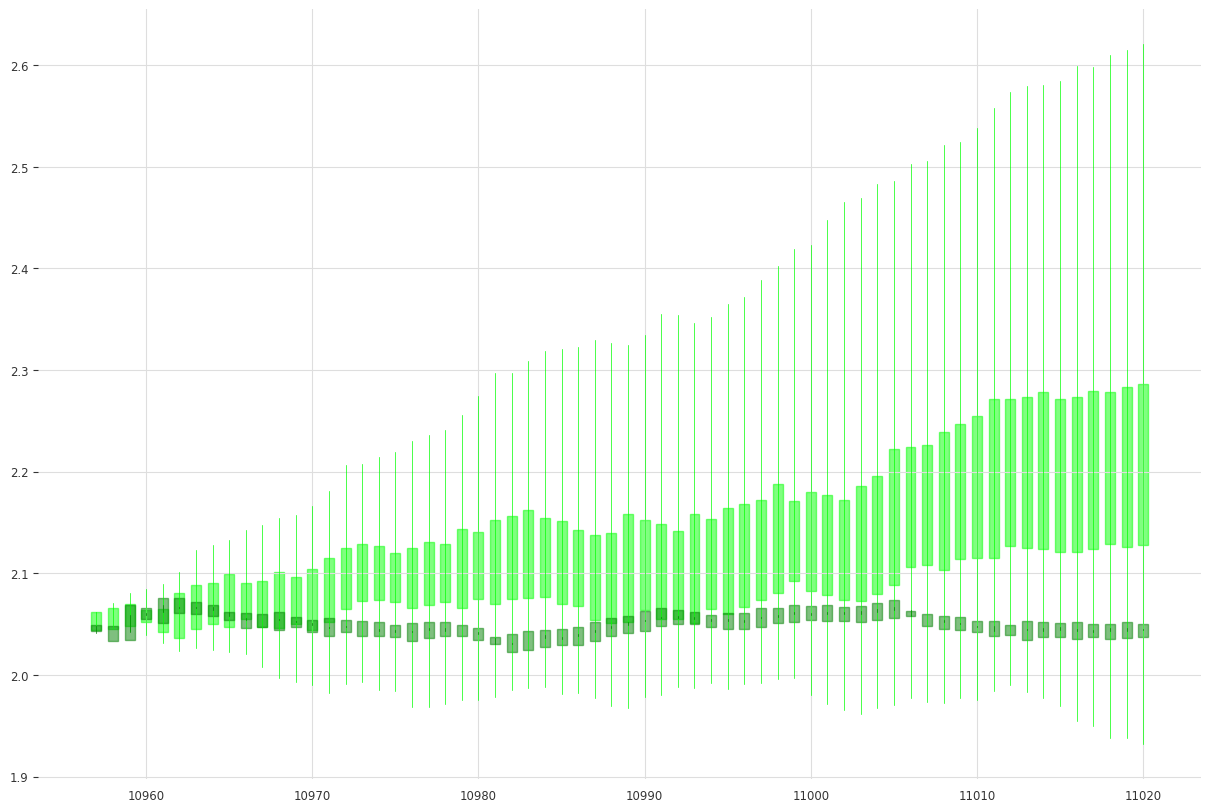

In [304]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Create a DataFrame from the 'candlesticks' array
columns = ["Open", "High", "Low", "Close", "Volume", "Quote asset volume"]
candlesticks_df = pd.DataFrame(inverted_target, columns=columns)
candlesticks_pred_df = pd.DataFrame(inverted_pred, columns=columns)

# Adding a fake date index (mplfinance needs this)
candlesticks_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_df.shape[0])
candlesticks_df['Date'] = candlesticks_df['Date'].apply(mdates.date2num)
candlesticks_pred_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_pred_df.shape[0])
candlesticks_pred_df['Date'] = candlesticks_pred_df['Date'].apply(mdates.date2num)

# Reordering columns to fit mplfinance requirements
candlesticks_df = candlesticks_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
candlesticks_pred_df = candlesticks_pred_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

candlestick_ohlc(ax, candlesticks_pred_df.values, width=0.6, colorup='lime', colordown='magenta', alpha=0.5)
candlestick_ohlc(ax, candlesticks_df.values, width=0.6, colorup='g', colordown='r', alpha=0.5)

plt.show()